## Preface

这次的算法作业要求我们对插入排序、归并排序以及快速排序做一些实现和分析。

实验要求如下：

> 1. **算法和代码的设计与实现**
    分别设计并实现插入排序、合并排序、快速排序的算法；
2. **测试**：设计测试数据集，编写测试程序，用于测试：
    <br><br>
    a) **正确性**：所实现的三种算法的正确性；<br>
    b) **算法复杂性**：三种排序算法中，设计测试数据集，评价各个算法在算法 复杂性上的表现（最好情况、最差情况、平均情况）；<br>
    c) **效率**：在三种排序算法中，设计测试数据集，评价各个算法中比较的频率，腾挪的频率。
    <br><br>
3. **撰写评价报告**： 结合第二步的测试和实验结果，在理论上给予总结和评价三种排序算法,在算法复杂性和效率上的表现。形成电子版实验报告。

## Introduction

### Insertion sort

插入排序是一个非常简单的排序算法。对于少量元素的排序，它是一个有效的算法。《算法导论》用这样一个例子介绍它：
> 插入排序的工作方式像许多人排序一手扑克牌。开始时，我们的左手为空并且桌子上的牌面朝下，然后我们每次从桌子上拿走一张牌并将他插入左手正确的位置，我们从右到左将它与已在手上的牌进行比较。拿在左手上的牌总是排好序的。

进行一些分析，不难发现这是一个时间复杂度为 $O(n^2)$ 的算法，这也是为什么刚才我们说它的适用范围是**少量元素的排序**，在稍后的实验中我们也将展示这一点：面对较大的数据集，插入排序的效率非常低。

容易看出**逆序**是插入排序的最坏情况。以刚才的扑克牌为例，这种情况下，每次拿到一张新牌，我们都不得不从最右侧一路扫描到最左侧，把原先所有牌往右移一个位置，才能完成一次插入。这个时候移动次数为 $\frac{n(n-1)}{2}$。

而最好的情况显然就是**顺序**了。这时候我们只需要比较 $n-1$ 次，并且由于每次的插入位置都是最右侧，所以之前已经排好序的部分不需要进行任何移动；这时候的时间复杂度为 $\theta(n)$。

### Merge sort

归并排序是**分治法（devide and conquer）**的一个典型案例。我们把一个数组的排序问题**分解**为两个已经排好序的子数组的合并问题。很自然地，我们会想要递归地解决这个问题，因为我们很容易发现当数组分解到只剩一个元素的时候，它是已经排好序了的——这就是我们的**基础情况（base case）**。
根据之前对算法复杂度的知识，我们可以算出它是一个 $O(nlgn)$ 的算法。

归并排序的特点是它不存在通常情况下的最好、最坏情况。在任何情况下它都能保证 $O(nlgn)$ 的效率。

## Quicksort

快速排序是一种效率很高的排序算法。它也使用了**分治**的思想。它把一个数组划分为两个（可能为空的）子数组，其中一个每一个元素都小于等于某元素，而令一个子数组每一个元素都大于该元素。这样递归下去，最后就能得到一个排好序的数组。

快速排序的运行时间依赖于**划分是否平衡**。而平衡与否又依赖于用于划分的元素。**如果划分是平衡的，那么快速排序的算法性能与归并排序一样。如果划分不平衡，那么快速排序的性能就接近于插入排序了**。

具体地说，如果划分产生的两个子问题分别包含了 $n-1$ 个元素和 $0$ 个元素，快速排序的**最坏情况**就发生了。如果每次递归调用都发生这种不平衡划分，我们有：
$$ T(0) = \theta (1)\\T(n) = T(n-1)+\theta (n) + T(0) = T(n-1) + \theta (n)$$
解得 $T(n) = \theta(n^2)$。

而在最好的情况下，划分得到的两个子问题的规模都不大于 $\frac{1}{2}$, 此时递归式为：
$$T(n) = 2T(n/2) + \theta(n)$$
解得 $T(n) = \theta(nlgn)$。

根据理论分析，快速排序的平均时间复杂度是 $O(nlgn)$，并且在实际使用中，如果实现得足够好，它的效率能达到归并排序的两三倍。

## Implementation

接下来我们对上述三个排序算法进行实现。按照要求，我们的算法还要求能计算排序中的比较和腾挪次数。

In [1]:
# initialize the global variable: numbers of comparisons and movements
cmp_num, move_num = 0,0

### Insertion sort


In [2]:
def insertion_sort(alist):
    '''
    An in-place insertion sort implementation.
    
    Parameters:
    alist -- the list to be sorted.
    
    returns:
    since it is a in-place sort, we return none here.
    '''
    n = len(alist)
    global cmp_num, move_num
    
    # if only 1 or 0 element
    if n <= 1:
        return
    
    
    for i in range(1,n):
        temp = alist[i]
        j = i-1
        while j >= 0 and alist[j] > temp:
            cmp_num += 1 # here we ignore the comparison between j and 0
            alist[j + 1] = alist[j] # move elements which are larger than temp right
            move_num += 1
            j -= 1
            
        if j >= 0: cmp_num += 1 # the last comparison fails to enter the loop
        alist[j + 1] = temp # when found the position
        
        
    return

以下是我进行的简单测试。这里仅是初步验证，后续还有按照严格要求的测试步骤。

In [3]:
# sample test

# case 1
cmp_num, move_num = 0, 0
a = [1,2,3,4,5,6]
insertion_sort(a)
print(a)
print(cmp_num, move_num)

# case 2
cmp_num, move_num = 0, 0
b = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
insertion_sort(b)
print(b)
print(cmp_num, move_num)

# case 3
cmp_num, move_num = 0, 0
c = [4, 0, 7, 2, 3, 8, 4, 6]
d = c.copy()
insertion_sort(c)

#compare with the sorted method built in Python
d = sorted(d)
print(d)
print(c)
print(d == c)
print(cmp_num, move_num)

[1, 2, 3, 4, 5, 6]
5 0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
45 45
[0, 2, 3, 4, 4, 6, 7, 8]
[0, 2, 3, 4, 4, 6, 7, 8]
True
15 9


In [4]:
print(b)
b[1:5]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[2, 3, 4, 5]

### Merge sort

In [5]:
def merge_sort(alist):
    n = len(alist)
    
    if n <= 1: # already sorted for only 1 element
        return alist
    
    middle = n//2
    
    return merge(merge_sort(alist[:middle]), merge_sort(alist[middle:])) # recursive sorting

def merge(left, right):
    global cmp_num, move_num
    result = []
    len_l = len(left)
    len_r = len(right)
    
    i,j = 0,0
    
    # merge
    while i < len_l and j < len_r:
        if left[i] <= right[j]: # use <= to keep it stable
            cmp_num += 1
            result.append(left[i])
            move_num += 1
            i += 1
        else:
            cmp_num += 1
            result.append(right[j])
            move_num += 1
            j += 1
            
    # concatenate
    result.extend(left[i:len_l])
    move_num += len_l - i
    result.extend(right[j:len_r])
    move_num += len_r - j
    
    # here we return the result,so actually we have to move all elements again
  #  move_num += len_l + len_r
    return result

In [6]:
# sample test

# case 1
cmp_num, move_num = 0, 0
a = [4, 0, 7, 2, 3, 8, 4, 6]
a = merge_sort(a)
print(a)
print(cmp_num, move_num)



[0, 2, 3, 4, 4, 6, 7, 8]
17 24


### Quicksort

In [7]:
import random

def qsort(alist):
    less = []
    equal = []
    greater = []
    global cmp_num, move_num

    if len(alist) <= 1:
        return alist
    
    index = random.randint(0, len(alist)-1)
    pivot = alist[index] # choose the first element as the pivot
    for i in alist:
        if i < pivot:
            cmp_num += 1
            less.append(i)
            move_num += 1
        elif i == pivot:
            cmp_num += 1
            equal.append(i)
            move_num += 1
        else:
            cmp_num += 1
            greater.append(i)
            move_num += 1
    
    return qsort(less) + equal + qsort(greater) #join the lists together

In [8]:
cmp_num, move_num = 0, 0
a = [4, 0, 7, 2, 3, 8, 4, 6]
a = qsort(a)
print(a)
print(cmp_num, move_num)

[0, 2, 3, 4, 4, 6, 7, 8]
32 32


## the Test of correctness

我们首先需要测试刚才的程序的正确性。如果我们的实现存在错误，那么之后的分析也就毫无意义了。

这里我们采用的测试方式是与python内置的`sorted`进行对比：在不同大小的数据集上（从 $50$ 到 $100000$）分别使用我们实现的算法和`sorted`进行排序，比较两次排序的结果。如果每次排序结果都与`sorted`相同，那么我们就认为排序正确。

这里我们的数据集使用numpy的random模块随机产生，大小范围在 $0$ 到 $500000$ 之间，均为浮点数。

In [9]:
import numpy as np

def correct_test(flag):
    '''
    Test the correctness of the three algorithm implementatin.
    
    parameters:
    flag -- the signal to determine which sorting algorithm to test.
    flag == 1 -- insertion sort
    flag == 2 -- merge sort
    flag == 3 -- quicksort
    '''
    data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]
    
    for i in data_size:
        data = list(500000*np.random.random(i))
        sorted_data = sorted(data)
        
        if flag == 1:
            if i > 10000: 
                print('Too large dataset for insertion sort, It will take a long time!')
            else:
                insertion_sort(data)
                print('Same as the built-in sorted method:', data == sorted_data)
        elif flag == 2:
            data = merge_sort(data)
            print('Same as the built-in sorted method:', data == sorted_data)
        else:
            data = qsort(data)
            print('Same as the built-in sorted method:', data == sorted_data)
            

In [10]:
# test the correctness of insertion sort implementation
correct_test(1)

Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Too large dataset for insertion sort, It will take a long time!
Too large dataset for insertion sort, It will take a long time!
Too large dataset for insertion sort, It will take a long time!


这里我打断了在80000和100000大小的数据集上的测试，因为这对插入排序来说耗时太久了。

In [11]:
# test the correctness of merge sort implementation
correct_test(2)

Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True


In [12]:
# test the correct_ness of quicksort implementation
correct_test(3)

Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True
Same as the built-in sorted method: True


## Test of complexity and efficiency

实验要求我们对**最好情况、最坏情况和平均情况**都做测试。

我们上面的介绍提到，**插入排序**的最好情况是正序数组，最坏情况是逆序数组；**快速排序**最好情况是每次都等分子数组，最坏情况是每次都极度不平衡，在我们的实现中，选取第一个元素作为基准，因此这个最坏情况就包括正序和逆序；而**归并排序**并不存在一般意义上的最好最坏情况。

因此这里我们选择的测试数据是不同大小的正序、逆序和随机数据集。

### Ascending order

In [13]:
import time

def comp_test_ordered(flag):
    '''
    Test the complexity of each sorting algorithm.
    
    parameters:
    flag -- the signal to determine which sorting algorithm to test.
    flag == 1 -- insertion sort
    flag == 2 -- merge sort
    flag == 3 -- quicksort
    '''
    global cmp_num, move_num
    cmp = []
    mov = []
    runtime = []
    
    # generate the datasets
    data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]
    
    print('The ordered datasets:')
    for i in data_size:
        cmp_num, move_num = 0, 0
        data = sorted(list(500000*np.random.random(i)))
        
        if flag == 1:
            tic = time.time()
            insertion_sort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
        elif flag == 2:
            tic = time.time()
            data = merge_sort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
        else:
            #if i > 2000:
            #    print('Recursion depth exceeded here!')
            #else:
            tic = time.time()
            data = qsort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
            
    return cmp, mov, runtime

In [14]:
cmp_insert, mov_insert, runtime_insert = comp_test_ordered(1)

The ordered datasets:

 The comparison number: 49
The movement number: 0
The running time:(s) 0.0

 The comparison number: 99
The movement number: 0
The running time:(s) 0.0

 The comparison number: 199
The movement number: 0
The running time:(s) 0.0

 The comparison number: 499
The movement number: 0
The running time:(s) 0.0

 The comparison number: 999
The movement number: 0
The running time:(s) 0.001003265380859375

 The comparison number: 1999
The movement number: 0
The running time:(s) 0.0

 The comparison number: 4999
The movement number: 0
The running time:(s) 0.0027358531951904297

 The comparison number: 7999
The movement number: 0
The running time:(s) 0.002910137176513672

 The comparison number: 9999
The movement number: 0
The running time:(s) 0.003007173538208008

 The comparison number: 49999
The movement number: 0
The running time:(s) 0.03710031509399414

 The comparison number: 79999
The movement number: 0
The running time:(s) 0.05111050605773926

 The comparison number:

In [15]:
cmp_merge, mov_merge, runtime_merge = comp_test_ordered(2)

The ordered datasets:

 The comparison number: 133
The movement number: 286
The running time:(s) 0.0

 The comparison number: 316
The movement number: 672
The running time:(s) 0.0

 The comparison number: 732
The movement number: 1544
The running time:(s) 0.001003265380859375

 The comparison number: 2216
The movement number: 4488
The running time:(s) 0.003008127212524414

 The comparison number: 4932
The movement number: 9976
The running time:(s) 0.0050106048583984375

 The comparison number: 10864
The movement number: 21952
The running time:(s) 0.009025812149047852

 The comparison number: 29804
The movement number: 61808
The running time:(s) 0.019010066986083984

 The comparison number: 51456
The movement number: 103808
The running time:(s) 0.039966583251953125

 The comparison number: 64608
The movement number: 133616
The running time:(s) 0.059194087982177734

 The comparison number: 382512
The movement number: 784464
The running time:(s) 0.4592256546020508

 The comparison number:

In [16]:
cmp_quick, mov_quick, runtime_quick = comp_test_ordered(3)

The ordered datasets:

 The comparison number: 289
The movement number: 289
The running time:(s) 0.0

 The comparison number: 713
The movement number: 713
The running time:(s) 0.0010051727294921875

 The comparison number: 1572
The movement number: 1572
The running time:(s) 0.00180816650390625

 The comparison number: 5260
The movement number: 5260
The running time:(s) 0.003009319305419922

 The comparison number: 11471
The movement number: 11471
The running time:(s) 0.006016254425048828

 The comparison number: 24360
The movement number: 24360
The running time:(s) 0.012034177780151367

 The comparison number: 75335
The movement number: 75335
The running time:(s) 0.035112857818603516

 The comparison number: 124607
The movement number: 124607
The running time:(s) 0.09926056861877441

 The comparison number: 157187
The movement number: 157187
The running time:(s) 0.09224486351013184

 The comparison number: 946795
The movement number: 946795
The running time:(s) 0.6818482875823975

 The

我们看到，在正序的情况下，快速排序面对较大的数据集会面对**超过最大递归深度**的问题。这也说明了这的确是快排的最坏情况。

接下来我们对刚才得到的数据作图。

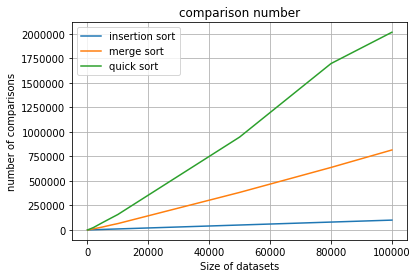

In [17]:
from matplotlib.pyplot import *
% matplotlib inline

x = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 50000, 80000, 100000]


plot(x, cmp_insert, label = 'insertion sort')
plot(x, cmp_merge, label = 'merge sort')
plot(x, cmp_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of comparisons')
title('comparison number')
grid()

这里实际上体现了随机选取基准元素的优越性，因为之前我在以第一个元素为基准的时候，这张图是这样的：
![image.png][p]

[p]: http://static.zybuluo.com/EtoDemerzel/k35htj3z0ailqbo3rt88ykz3/image_1cacu4i31fh41ibv19gn9du17u39.png

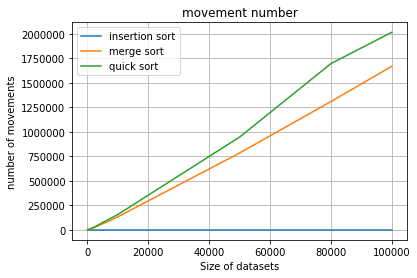

In [18]:
plot(x, mov_insert, label = 'insertion sort')
plot(x, mov_merge, label = 'merge sort')
plot(x, mov_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of movements')
title('movement number')
grid()

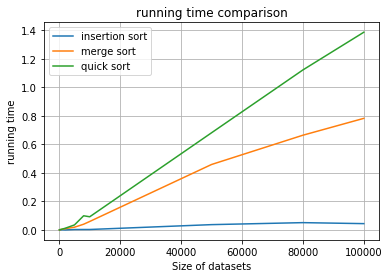

In [19]:
plot(x, runtime_insert, label = 'insertion sort')
plot(x, runtime_merge, label = 'merge sort')
plot(x, runtime_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('running time')
title('running time comparison')
grid()

### Descending order

In [40]:
def comp_test_descend(flag):
    '''
    Test the complexity of each sorting algorithm.
    
    parameters:
    flag -- the signal to determine which sorting algorithm to test.
    flag == 1 -- insertion sort
    flag == 2 -- merge sort
    flag == 3 -- quicksort
    '''
    global cmp_num, move_num
    cmp = []
    mov = []
    runtime = []
    
    # generate the datasets
    data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000]
    
    print('The ordered datasets:')
    for i in data_size:
        cmp_num, move_num = 0, 0
        data = sorted(list(500000*np.random.random(i)))
        data.reverse() # make it in descending order
        
        if flag == 1:
            tic = time.time()
            insertion_sort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
        elif flag == 2:
            tic = time.time()
            data = merge_sort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
        else:
            tic = time.time()
            data = qsort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
            
    return cmp, mov, runtime

In [41]:
cmp_insert, mov_insert, runtime_insert = comp_test_descend(1)

The ordered datasets:

 The comparison number: 1225
The movement number: 1225
The running time:(s) 0.00031185150146484375

 The comparison number: 4950
The movement number: 4950
The running time:(s) 0.0020055770874023438

 The comparison number: 19900
The movement number: 19900
The running time:(s) 0.007019519805908203

 The comparison number: 124750
The movement number: 124750
The running time:(s) 0.05915546417236328

 The comparison number: 499500
The movement number: 499500
The running time:(s) 0.2506875991821289

 The comparison number: 1999000
The movement number: 1999000
The running time:(s) 1.2372546195983887

 The comparison number: 12497500
The movement number: 12497500
The running time:(s) 7.6202943325042725

 The comparison number: 31996000
The movement number: 31996000
The running time:(s) 19.903905391693115

 The comparison number: 49995000
The movement number: 49995000
The running time:(s) 30.42995524406433


In [43]:
cmp_merge, mov_merge, runtime_merge = comp_test_descend(2)

The ordered datasets:

 The comparison number: 153
The movement number: 286
The running time:(s) 0.0005426406860351562

 The comparison number: 356
The movement number: 672
The running time:(s) 0.0004589557647705078

 The comparison number: 812
The movement number: 1544
The running time:(s) 0.0020046234130859375

 The comparison number: 2272
The movement number: 4488
The running time:(s) 0.003008127212524414

 The comparison number: 5044
The movement number: 9976
The running time:(s) 0.00501251220703125

 The comparison number: 11088
The movement number: 21952
The running time:(s) 0.010057210922241211

 The comparison number: 32004
The movement number: 61808
The running time:(s) 0.030079126358032227

 The comparison number: 52352
The movement number: 103808
The running time:(s) 0.05798459053039551

 The comparison number: 69008
The movement number: 133616
The running time:(s) 0.08417892456054688


In [44]:
cmp_quick, mov_quick, runtime_quick = comp_test_descend(3)

The ordered datasets:

 The comparison number: 255
The movement number: 255
The running time:(s) 0.0

 The comparison number: 669
The movement number: 669
The running time:(s) 0.0010020732879638672

 The comparison number: 1526
The movement number: 1526
The running time:(s) 0.000896453857421875

 The comparison number: 5283
The movement number: 5283
The running time:(s) 0.0030558109283447266

 The comparison number: 11097
The movement number: 11097
The running time:(s) 0.007019519805908203

 The comparison number: 26630
The movement number: 26630
The running time:(s) 0.016043424606323242

 The comparison number: 77858
The movement number: 77858
The running time:(s) 0.0401151180267334

 The comparison number: 122249
The movement number: 122249
The running time:(s) 0.0974125862121582

 The comparison number: 158609
The movement number: 158609
The running time:(s) 0.10427546501159668


**以下曲线很难区分归并排序与快速排序，因此我们针对这二者附上了另外的作图**。

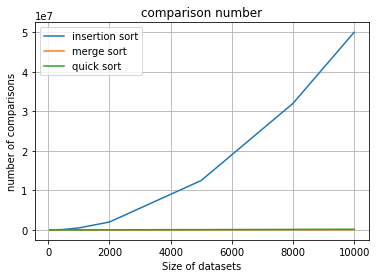

In [45]:
x = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000]
x1 = [50, 100, 200, 500, 1000, 2000]

plot(x, cmp_insert, label = 'insertion sort')
plot(x, cmp_merge, label = 'merge sort')
plot(x, cmp_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of comparisons')
title('comparison number')
grid()

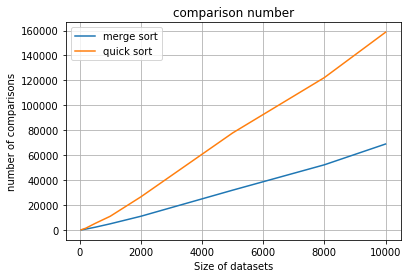

In [46]:
plot(x, cmp_merge, label = 'merge sort')
plot(x, cmp_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of comparisons')
title('comparison number')
grid()

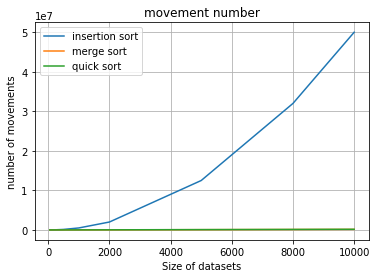

In [47]:
plot(x, mov_insert, label = 'insertion sort')
plot(x, mov_merge, label = 'merge sort')
plot(x, mov_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of movements')
title('movement number')
grid()

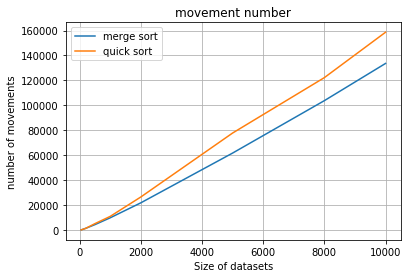

In [48]:
plot(x, mov_merge, label = 'merge sort')
plot(x, mov_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of movements')
title('movement number')
grid()

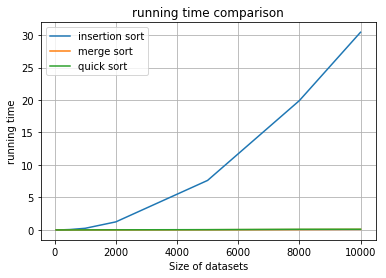

In [49]:
plot(x, runtime_insert, label = 'insertion sort')
plot(x, runtime_merge, label = 'merge sort')
plot(x, runtime_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('running time')
title('running time comparison')
grid()

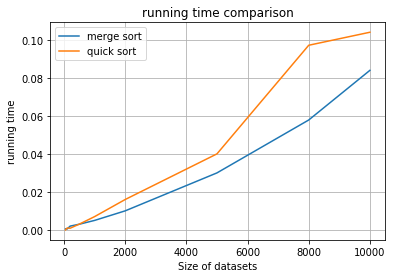

In [50]:
plot(x, runtime_merge, label = 'merge sort')
plot(x, runtime_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('running time')
title('running time comparison')
grid()

### Random order

In [51]:
def comp_test_random(flag):
    '''
    Test the complexity of each sorting algorithm.
    
    parameters:
    flag -- the signal to determine which sorting algorithm to test.
    flag == 1 -- insertion sort
    flag == 2 -- merge sort
    flag == 3 -- quicksort
    '''
    global cmp_num, move_num
    cmp = []
    mov = []
    runtime = []
    
    # generate the datasets
    data_size = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000,50000, 80000, 100000]
    
    print('The ordered datasets:')
    for i in data_size:
        cmp_num, move_num = 0, 0
        data = list(500000*np.random.random(i))
        
        if flag == 1:
            if(i > 10000):
                print('Too large dataset for insertion sort!')
            else:
                tic = time.time()
                insertion_sort(data)
                toc = time.time()
                print('\n The comparison number:', cmp_num)
                print('The movement number:', move_num)
                print('The running time:(s)', toc - tic)
                cmp.append(cmp_num)
                mov.append(move_num)
                runtime.append(toc -tic)    
        elif flag == 2:
            tic = time.time()
            data = merge_sort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
        else:
            tic = time.time()
            data = qsort(data)
            toc = time.time()
            print('\n The comparison number:', cmp_num)
            print('The movement number:', move_num)               
            print('The running time:(s)', toc - tic)
            cmp.append(cmp_num)
            mov.append(move_num)
            runtime.append(toc -tic)    
            
    return cmp, mov, runtime

In [52]:
cmp_insert, mov_insert, runtime_insert = comp_test_random(1)

The ordered datasets:

 The comparison number: 646
The movement number: 600
The running time:(s) 5.555152893066406e-05

 The comparison number: 2857
The movement number: 2762
The running time:(s) 0.0019495487213134766

 The comparison number: 10770
The movement number: 10577
The running time:(s) 0.004369258880615234

 The comparison number: 58779
The movement number: 58283
The running time:(s) 0.028073787689208984

 The comparison number: 238491
The movement number: 237499
The running time:(s) 0.1093294620513916

 The comparison number: 1005271
The movement number: 1003277
The running time:(s) 0.5404376983642578

 The comparison number: 6358632
The movement number: 6353639
The running time:(s) 3.4623098373413086

 The comparison number: 16027709
The movement number: 16019719
The running time:(s) 7.1149420738220215

 The comparison number: 25133159
The movement number: 25123176
The running time:(s) 13.888960838317871
Too large dataset for insertion sort!
Too large dataset for insertion 

In [53]:
cmp_merge, mov_merge, runtime_merge = comp_test_random(2)

The ordered datasets:

 The comparison number: 225
The movement number: 286
The running time:(s) 0.0010409355163574219

 The comparison number: 539
The movement number: 672
The running time:(s) 0.0

 The comparison number: 1286
The movement number: 1544
The running time:(s) 0.0010526180267333984

 The comparison number: 3859
The movement number: 4488
The running time:(s) 0.004038572311401367

 The comparison number: 8712
The movement number: 9976
The running time:(s) 0.010030269622802734

 The comparison number: 19394
The movement number: 21952
The running time:(s) 0.014337301254272461

 The comparison number: 55237
The movement number: 61808
The running time:(s) 0.03913426399230957

 The comparison number: 93659
The movement number: 103808
The running time:(s) 0.07924556732177734

 The comparison number: 120447
The movement number: 133616
The running time:(s) 0.10828590393066406

 The comparison number: 718434
The movement number: 784464
The running time:(s) 0.5986194610595703

 The c

In [54]:
cmp_quick, mov_quick, runtime_quick = comp_test_random(3)

The ordered datasets:

 The comparison number: 305
The movement number: 305
The running time:(s) 0.0

 The comparison number: 783
The movement number: 783
The running time:(s) 0.0010857582092285156

 The comparison number: 1777
The movement number: 1777
The running time:(s) 0.001920938491821289

 The comparison number: 5399
The movement number: 5399
The running time:(s) 0.004396200180053711

 The comparison number: 12727
The movement number: 12727
The running time:(s) 0.009996414184570312

 The comparison number: 25812
The movement number: 25812
The running time:(s) 0.017606258392333984

 The comparison number: 70992
The movement number: 70992
The running time:(s) 0.03818035125732422

 The comparison number: 128304
The movement number: 128304
The running time:(s) 0.07515358924865723

 The comparison number: 178060
The movement number: 178060
The running time:(s) 0.11225628852844238

 The comparison number: 1025939
The movement number: 1025939
The running time:(s) 0.5845203399658203

 T

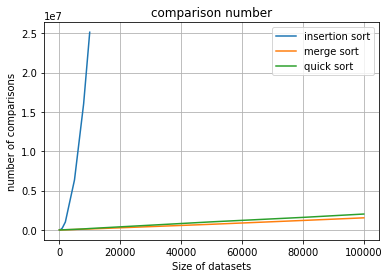

In [55]:
x = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000,50000, 80000, 100000]
x1 = [50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000]


plot(x1, cmp_insert, label = 'insertion sort')
plot(x, cmp_merge, label = 'merge sort')
plot(x, cmp_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of comparisons')
title('comparison number')
grid()

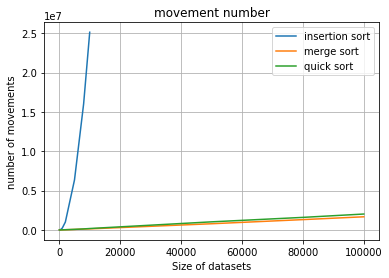

In [56]:
plot(x1, mov_insert, label = 'insertion sort')
plot(x, mov_merge, label = 'merge sort')
plot(x, mov_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of movements')
title('movement number')
grid()

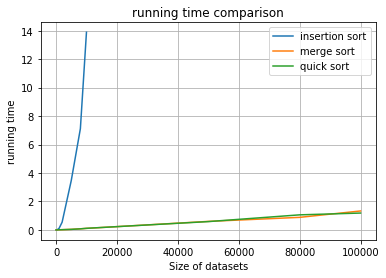

In [57]:
plot(x1, runtime_insert, label = 'insertion sort')
plot(x, runtime_merge, label = 'merge sort')
plot(x, runtime_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('running time')
title('running time comparison')
grid()

由于插入排序与另外两种排序算法差距明显，在同一个图上作图很难观察快速排序与归并排序的差别，因此这里我们对快速排序和归并排序另外进行了作图对比。

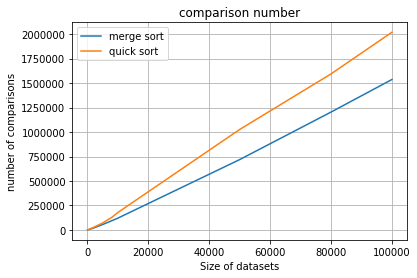

In [58]:
plot(x, cmp_merge, label = 'merge sort')
plot(x, cmp_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of comparisons')
title('comparison number')
grid()

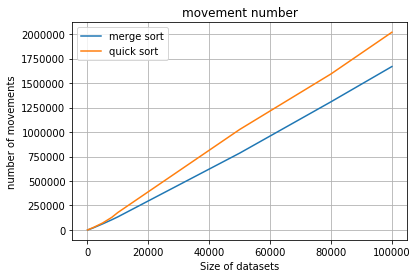

In [59]:
plot(x, mov_merge, label = 'merge sort')
plot(x, mov_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('number of movements')
title('movement number')
grid()

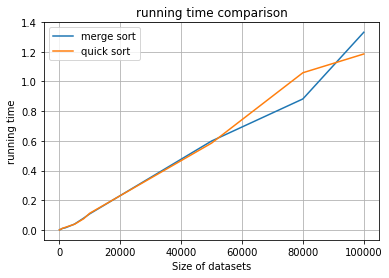

In [60]:
plot(x, runtime_merge, label = 'merge sort')
plot(x, runtime_quick, label = 'quick sort')
legend(loc = 'best')
xlabel('Size of datasets')
ylabel('running time')
title('running time comparison')
grid()

## Conclusion

1. 插入排序作为一个 $O(n^2)$ 的算法，在面对较大的数据集的时候，与归并排序和快速排序差距明显；因此它只适合用于较小的数据集；
2. 归并排序的比较和腾挪次数在不同的数据集上都非常稳定，而快速排序的效率则取决于数据本身的性质；在实际使用中，如果我们的数据具有局部有序的性质（这是经常发生的情况），那么我们也许会倾向于使用归并排序。
3. 快速排序的效率与实现方式具有很大的关系。在我们的实现中，做了两个优化：一是每次分区的时候分为小于、等于、大于三部分；二是每次随机选取基准元素。由于每次随机选取了基准元素，那么升序和降序就不再是快速排序的最坏情况了；在我之前以首元素作为基准时，这两种情况下，在数据量达到5000的时候，就会达到python所允许的最大递归深度，这种情况有多么糟糕可见一斑。
4. 我实现的快速排序并非原地排序，而与归并排序一样是返回了一个新数组；因此在与归并排序的比较中，它并没有体现很大优势。不过在数据量达到90000的时候，快速排序的效率开始超过了归并排序；相信如果将它改为原地排序的版本这个局面会更加明显。但是这样我们也能看出，两种算法大体上是比较接近的复杂度。